### Questions
* What is bias?
    *  cumulative sum of differences sum(abs((yhat - y)))
* Are bias and variance related to accuracy and precision?

### Objectives
YWBAT
* explain ridge and lasso regression
* explain what hyperparameters do
* explain bias and variance tradeoff 

### Outline

In [40]:
import pandas as pd
import numpy as np


import statsmodels.api as sm
import scipy.stats as scs

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


import matplotlib.pyplot as plt

In [101]:
x = np.linspace(0, 2*np.pi, 1000)
intercept = np.random.randint(20, 30)

In [115]:
x2 = np.column_stack([x, x**2])
x3 = np.column_stack([x2, x**3])
x4 = np.column_stack([x3, x**4])
xfin = np.column_stack([x4, x**5])

In [116]:
error = np.random.normal(1, 0.5, 1000)

In [117]:
y = np.sin(x) + error + intercept

In [118]:
xfin = sm.add_constant(xfin)
linreg = sm.OLS(y, xfin).fit()

In [119]:
xfin

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.28947478e-03, 3.95574930e-05, 2.48795855e-07,
        1.56479526e-09, 9.84174030e-12],
       [1.00000000e+00, 1.25789496e-02, 1.58229972e-04, 1.99036684e-06,
        2.50367241e-08, 3.14935689e-10],
       ...,
       [1.00000000e+00, 6.27060636e+00, 3.93205041e+01, 2.46563403e+02,
        1.54610204e+03, 9.69499729e+03],
       [1.00000000e+00, 6.27689583e+00, 3.93994213e+01, 2.47306063e+02,
        1.55231440e+03, 9.74371578e+03],
       [1.00000000e+00, 6.28318531e+00, 3.94784176e+01, 2.48050213e+02,
        1.55854546e+03, 9.79262991e+03]])

In [120]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     393.5
Date:                Fri, 07 Jun 2019   Prob (F-statistic):          1.00e-232
Time:                        11:51:06   Log-Likelihood:                -717.35
No. Observations:                1000   AIC:                             1447.
Df Residuals:                     994   BIC:                             1476.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0766      0.094    236.025      0.000      21.893      22.260
x1             0.5150      0.301      1.709      0.088      -0.076       1.106
x2             0.6544      0.298      2.199      0.028       0.070       1.238
x3            -0.5536      0.120     -4.608      0.000      -0.789      -0.318
x4             0.1156      0.021      5.481      0.000       0.074       0.157
x5            -0.0074      0.001     -5.506      0.000      -0.010      -0.005
==============================================================================
Omnibus:                        5.749   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.660
Skew:                           0.182   Prob(JB):                       0.0590
Kurtosis:                       3.061   Cond. No.                     8.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
yhat = linreg.predict()

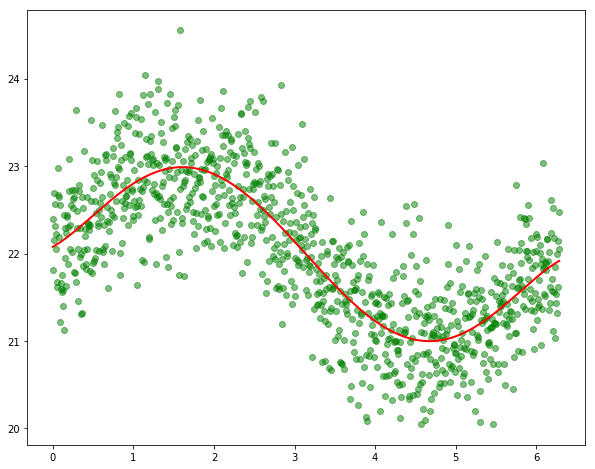

In [122]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='g', alpha=0.5)
plt.plot(x, yhat, linewidth=2, c='r')
plt.show()

In [113]:
resid = yhat - y

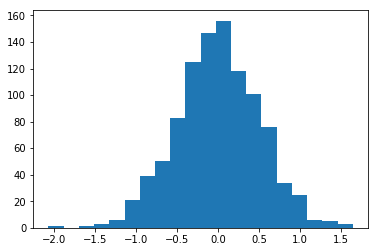

In [114]:
plt.hist(resid, bins=20)
plt.show()

In [70]:
poly = PolynomialFeatures(2)

In [80]:
xfin = poly.fit_transform(x.)

# Ridge and Lasso are applied to our cost function
What cost function do we normally use? 

residuals, mean squared, rmse

Ridge_Cost = MSE + $\lambda \sum(\beta_j^2)$

What is lambda times the sum of our beta js for j>=1?

it's as simple as saying *it* is a constant a number

why do we want to add penalty as we add features? 
Because it's going to increase our bias and decrease our variance. 

bias comes from training. 

bias increases by increasing training size or increasing terms



variance is the ability to predict unseen data

loses flexibility when it's biased

### What about lambda?

if lambda = 0 then what happens?

**our cost function remains the same**

if lambda >>1 then what happens?

**our error gets too big and we're no longer letting our model have robustedness**

RidgeCostFunction(betas, lambda)

LassoCostFunction(betas, lambda)

LassoCostFunction = MSE + $\lambda \sum\|\beta_j\|$

examples

high bias, low variance: trainscore = 90%, testscore = 50%

low bias, low variance: trainscore = 40%, testscore = 40%

high bias, high variance: trainscore = 85%, testscore = 85%

### WDWL
* putting the train/test scores clarifies what we're looking for in a model
* better understanding of ridge and lasso and why we use it
* ridge and lasso are methods for balancing the bias/variance tradeoff
* we learned why linear regression models can form curved lines